In [25]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, GPTNeoForCausalLM
sns.set_style('whitegrid')
from sklearn.utils import shuffle


In [11]:
# !git clone https://huggingface.co/EleutherAI/gpt-neo-125M

Cloning into 'gpt-neo-125M'...
Filtering content:  66% (2/3), 979.25 MiB | 214.84 MiB/s
Filtering content:  66% (2/3), 1.44 GiB | 226.29 MiB/s  
Filtering content: 100% (3/3), 1.44 GiB | 226.29 MiB/s
Filtering content: 100% (3/3), 1.44 GiB | 40.79 MiB/s, done.


In [2]:
# Download model
model = 'gpt-neo-125M'
tokenizer = AutoTokenizer.from_pretrained(model)
# tokenizer = AutoTokenizer.from_pretrained(model)
model = GPTNeoForCausalLM.from_pretrained(model)

In [3]:
data = pd.read_json("quotes.json")

In [4]:
data.head()

,Quote,Author,Tags,Popularity,Category
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,life
1,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,happiness
2,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,love
3,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,life
4,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,truth


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48391 entries, 0 to 48390
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quote       48391 non-null  object 
 1   Author      48391 non-null  object 
 2   Tags        48391 non-null  object 
 3   Popularity  48391 non-null  float64
 4   Category    48391 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


<AxesSubplot:xlabel='Quote', ylabel='Count'>

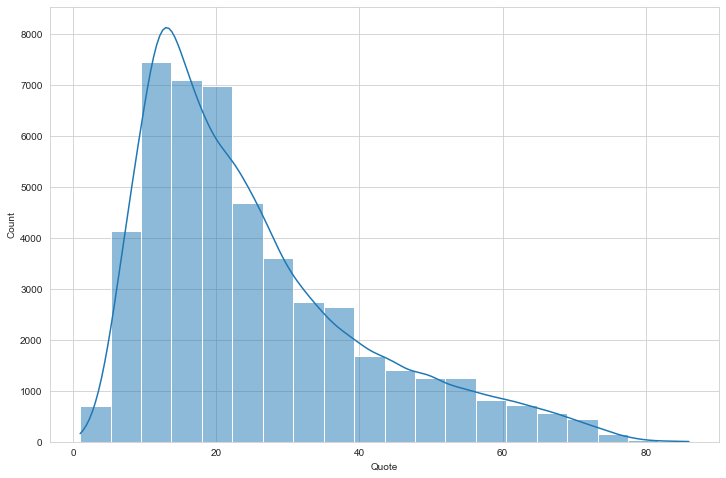

In [6]:
plt.figure(figsize=(12,8))
sns.histplot(data['Quote'].apply(lambda x:len(x.split())),bins=20,kde=True)

In [4]:
data['Category'].unique()

array(['life', 'happiness', 'love', 'truth', 'inspiration', 'humor',
       'philosophy', 'science', '', 'soul', 'books', 'wisdom',
       'knowledge', 'education', 'poetry', 'hope', 'friendship',
       'writing', 'religion', 'death', 'romance', 'success', 'arts',
       'relationship', 'motivation', 'faith', 'mind', 'god', 'funny',
       'quotes', 'positive', 'purpose'], dtype=object)

In [7]:
empty = data[data['Category']==""]
quotes = data[data['Category']!=""]

In [22]:
empty.head()

,Quote,Author,Tags,Popularity,Category
9,"Be who you are and say what you feel, because ...",Bernard M. Baruch,"[ataraxy, be-yourself, confidence, fitting-in,...",0.101890,
23,Friendship ... is born at the moment when one ...,"C.S. Lewis, The Four Loves",[friendship ],0.073322,
24,"If you want to know what a man's like, take a ...","J.K. Rowling, Harry Potter and the Goblet of ...","[from-charles-bayard-miliken, misattributed-j-...",0.072186,
25,Don’t walk in front of me… I may not followDon...,Albert Camus,"[friends, friendship, misattributed-albert-cam...",0.071550,
31,Always forgive your enemies; nothing annoys th...,Oscar Wilde,"[attributed-no-source, enemies, forgiveness, s...",0.061497,


In [23]:
empty["Quote"].iloc[2]

"If you want to know what a man's like, take a good look at how he treats his inferiors, not his equals."

In [12]:
quotes.head()

,Quote,Author,Tags,Popularity,Category
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,life
1,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,happiness
2,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,love
3,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,life
4,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,truth


C:\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'life'),
  Text(1, 0, 'happiness'),
  Text(2, 0, 'love'),
  Text(3, 0, 'truth'),
  Text(4, 0, 'inspiration'),
  Text(5, 0, 'humor'),
  Text(6, 0, 'philosophy'),
  Text(7, 0, 'science'),
  Text(8, 0, 'soul'),
  Text(9, 0, 'books'),
  Text(10, 0, 'wisdom'),
  Text(11, 0, 'knowledge'),
  Text(12, 0, 'education'),
  Text(13, 0, 'poetry'),
  Text(14, 0, 'hope'),
  Text(15, 0, 'friendship'),
  Text(16, 0, 'writing'),
  Text(17, 0, 'religion'),
  Text(18, 0, 'death'),
  Text(19, 0, 'romance'),
  Text(20, 0, 'success'),
  Text(21, 0, 'arts'),
  Text(22, 0, 'relationship'),
  Text(23, 0, 'motivation'),
  Text(24, 0, 'faith'),
  Text(25, 0, 'mind'),
  Text(26, 0, 'god'),
  Text(27, 0, 'funny'),
  Text(28, 0, 'quotes'),
  Text(29, 0, 'positive'),
  Text(30, 0, 'purpose')])

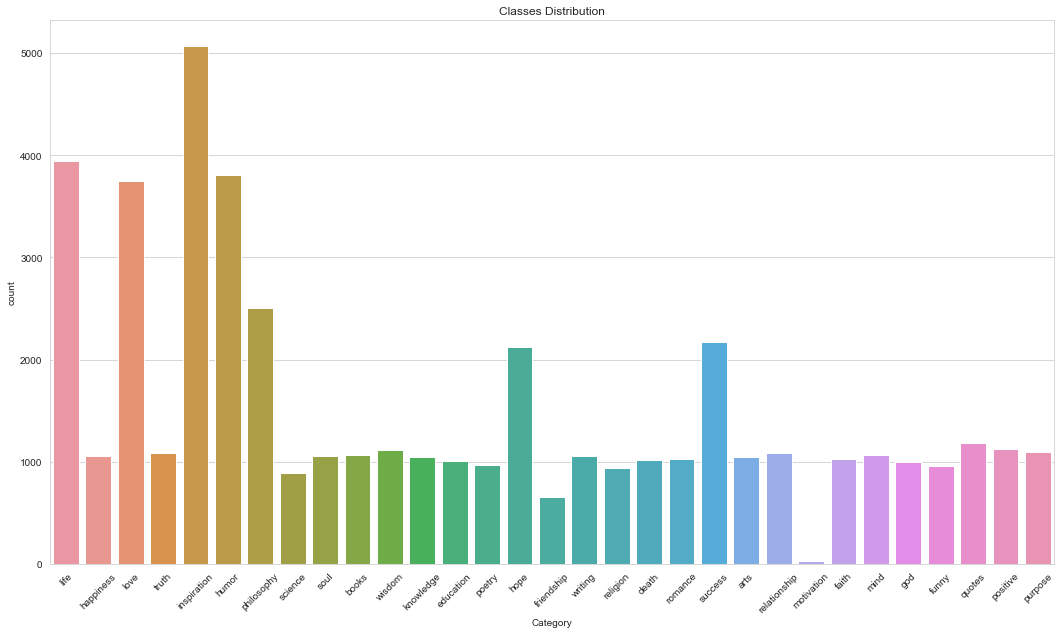

In [8]:
plt.figure(figsize=(18, 10))
plt.title("Classes Distribution")
sns.countplot(quotes['Category'])
plt.xticks(rotation=45)

In [57]:
# Only going with humor, insipiration, love, life 
life = quotes[(quotes['Category'] =='life')]
love = quotes[(quotes['Category'] =='love')] 
humor = quotes[(quotes['Category'] =='humor')] 
inspiration = quotes[(quotes['Category'] =='inspiration')]

In [58]:
final_data = pd.concat([life, love, humor, inspiration])
# inspiration.head()

In [59]:
final_data= shuffle(final_data)

In [62]:
len(final_data)

16570

In [63]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
final_data['cat_lab']=le.fit_transform(final_data['Category'])

In [64]:
final_data.to_csv('final_data.csv')

In [45]:
df = pd.read_csv('final_data.csv')

In [46]:
df.head()

,Unnamed: 0,Quote,Author,Tags,Popularity,Category
0,18479,"If my favorite three letters are X, Z, and Q, ...","Jarod Kintz, Xazaqazax","['absurd', 'favorite-letters', 'humor', 'langu...",0.000257,love
1,39562,S is for SCARY! Fear is driven out by action! ...,"Lucas Remmerswaal, The A-Z of 13 Habits: Insp...","['action', 'attitude', 'fear', 'habits', 'insp...",0.000010,inspiration
2,14022,What's the whole point of being pretty on the ...,"Jess C. Scott, I'm Pretty","['celebrity', 'celebrity-culture', 'celebrity-...",0.000436,humor
3,13369,Let me never fall into the vulgar mistake of d...,"Ralph Waldo Emerson, Emerson in His Journals","['contradiction', 'correcting', 'correction', ...",0.000492,inspiration
4,29891,Love and compassion are the mother and father ...,"Steve Maraboli, Life, the Truth, and Being Free","['compassion', 'happiness', 'inspirational', '...",0.000065,inspiration


In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['cat_lab']=le.fit_transform(df['Category'])

In [50]:
df.head()

,Unnamed: 0,Quote,Author,Tags,Popularity,Category,cat_lab
0,18479,"If my favorite three letters are X, Z, and Q, ...","Jarod Kintz, Xazaqazax","['absurd', 'favorite-letters', 'humor', 'langu...",0.000257,love,3
1,39562,S is for SCARY! Fear is driven out by action! ...,"Lucas Remmerswaal, The A-Z of 13 Habits: Insp...","['action', 'attitude', 'fear', 'habits', 'insp...",0.000010,inspiration,1
2,14022,What's the whole point of being pretty on the ...,"Jess C. Scott, I'm Pretty","['celebrity', 'celebrity-culture', 'celebrity-...",0.000436,humor,0
3,13369,Let me never fall into the vulgar mistake of d...,"Ralph Waldo Emerson, Emerson in His Journals","['contradiction', 'correcting', 'correction', ...",0.000492,inspiration,1
4,29891,Love and compassion are the mother and father ...,"Steve Maraboli, Life, the Truth, and Being Free","['compassion', 'happiness', 'inspirational', '...",0.000065,inspiration,1


In [52]:
df = df[['Quote','cat_lab']]

In [53]:
df.head()

,Quote,cat_lab
0,"If my favorite three letters are X, Z, and Q, ...",3
1,S is for SCARY! Fear is driven out by action! ...,1
2,What's the whole point of being pretty on the ...,0
3,Let me never fall into the vulgar mistake of d...,1
4,Love and compassion are the mother and father ...,1


In [42]:
df['cat_lab']=le.fit_transform(df['category'])

In [56]:
df.head()

,Quote,cat_lab
0,"If my favorite three letters are X, Z, and Q, ...",3
1,S is for SCARY! Fear is driven out by action! ...,1
2,What's the whole point of being pretty on the ...,0
3,Let me never fall into the vulgar mistake of d...,1
4,Love and compassion are the mother and father ...,1


In [55]:
df.to_csv('final_data.csv')

In [54]:
le.classes_

array(['humor', 'inspiration', 'life', 'love'], dtype=object)

In [76]:
df = pd.read_csv('final_data.csv',encoding='utf-8')

In [82]:
with open("train.txt",'w',encoding = 'utf-8') as f:
    for x in range(len(df)):
        text = f"Category: {df['Category'].iloc[x]}\nQuote: {df['Quote'].iloc[x]}\n###\n"
        f.write(text)

    print(text)
#     file = open("sample.txt", "w")
#     file.write(text)
# file.close()

Category: inspiration
Quote: You have a unique gift to offer this world. Be true to yourself, be kind to yourself, read and learn about everything that interests you and keep away from people who bring you down. When you treat yourself kindly and respect the uniqueness of those around you, you will be giving this world an amazing gift... YOU!
###

